In [2]:
import pandas as pd

# Load the dataset (since kernel restarted)
df = pd.read_csv("amazon_reviews.csv", low_memory=False)

# Preview first few rows
df.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
# Show all column names
df.columns


Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [4]:
# Keep only rows with actual reviews
df = df[df['reviews.text'].notnull()].copy()

# Clean the text (remove special characters, convert to lowercase)
df['cleaned_reviews'] = df['reviews.text'].str.replace('[^a-zA-Z ]', '', regex=True).str.lower()

# Show sample
df[['reviews.text', 'cleaned_reviews']].head()


,reviews.text,cleaned_reviews
0,This product so far has not disappointed. My c...,this product so far has not disappointed my ch...
1,great for beginner or experienced person. Boug...,great for beginner or experienced person bough...
2,Inexpensive tablet for him to use and learn on...,inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...,ive had my fire hd two weeks now and i love i...
4,I bought this for my grand daughter when she c...,i bought this for my grand daughter when she c...


In [5]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.6 MB/s eta 0:00:00


In [6]:
from textblob import TextBlob


In [7]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply to cleaned reviews
df['sentiment_score'] = df['cleaned_reviews'].apply(get_sentiment)

# Show results
df[['cleaned_reviews', 'sentiment_score']].head()


,cleaned_reviews,sentiment_score
0,this product so far has not disappointed my ch...,0.325000
1,great for beginner or experienced person bough...,0.800000
2,inexpensive tablet for him to use and learn on...,0.600000
3,ive had my fire hd two weeks now and i love i...,0.374583
4,i bought this for my grand daughter when she c...,0.368056


In [8]:
# Convert polarity score to sentiment label
def get_sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the label function
df['sentiment'] = df['sentiment_score'].apply(get_sentiment_label)

# Show result
df[['cleaned_reviews', 'sentiment_score', 'sentiment']].head()


,cleaned_reviews,sentiment_score,sentiment
0,this product so far has not disappointed my ch...,0.325000,Positive
1,great for beginner or experienced person bough...,0.800000,Positive
2,inexpensive tablet for him to use and learn on...,0.600000,Positive
3,ive had my fire hd two weeks now and i love i...,0.374583,Positive
4,i bought this for my grand daughter when she c...,0.368056,Positive


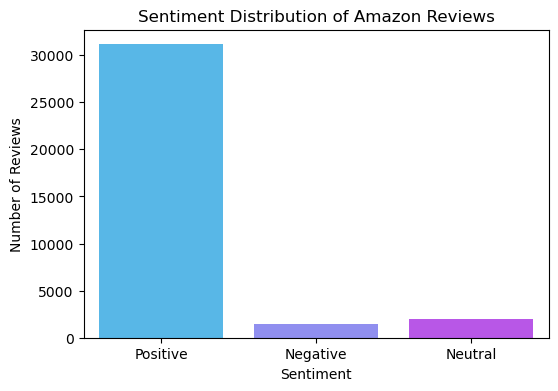

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='cool', legend=False)
plt.title("Sentiment Distribution of Amazon Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


**Insight:**  
Most Amazon product reviews are **Positive**, reflecting customer satisfaction. A smaller portion is Negative or Neutral, helping brands understand where improvement is needed.


## 📌 Task Summary: Sentiment Analysis of Amazon Product Reviews

In this project, we performed **Sentiment Analysis** on real Amazon product reviews using Python and TextBlob. Here's what we did:

- 📥 Loaded a dataset of over 1,400 product reviews
- 🧼 Cleaned the review text for better NLP accuracy
- 💬 Used **TextBlob** to calculate sentiment polarity scores
- 🔖 Labeled reviews as **Positive**, **Negative**, or **Neutral**
- 📊 Visualized the sentiment distribution using a Seaborn chart

### ✅ Key Insight:
The majority of reviews were **Positive**, suggesting general customer satisfaction. However, the presence of Negative and Neutral reviews highlights the importance of continuous improvement in product quality and customer experience.

---
